<a href="https://colab.research.google.com/github/aitorTD/churn_neural_network/blob/main/Copia_de_PIA_automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de datos

## Descargar dataset

Fuente: https://archive.ics.uci.edu/ml/datasets/automobile

Datos: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

Atributos: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names

In [357]:
!wget -qP datasets/ https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

!wget -qP datasets/ https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names

## Asignar dataset

El dataset contiene información sobre 205 automóviles y sus precios, aunque
no incluye los nombres de las columnas; esta información se encuentra en un archivo adicional. Concretamente, el dataset contiene:

i) información de un automóvil en términos de diversas características, 

ii) su nivel de riesgo en relación con el seguro, y

iii) el pago medio relativo de los siniestros ocurridos por año de seguro. 

Finalmente, cada fila del dataset contiene información sobre el precio por el que se vendió dicho vehículo. Esta sera la variable objetivo.

In [358]:
import pandas as pd
import numpy as np

In [359]:
feature_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size','fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


# los valores desconocidos en el dataset están marcados con una interrogación
df = pd.read_csv('datasets/imports-85.data', names = feature_names, na_values = '?')

In [360]:
print(len(df))

205


In [361]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0


In [362]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

# Preparación de los datos

Una vez importado el dataset, empezaremos identificando y corrigiendo
aquellos valores que falten en las filas. Para ello, primero identificaremos qué propiedades son las que presentan dichos valores utilizando el método isnull() del dataframe para filtrar por aquellas columnas que tengan al menos una celda sin valor.

In [363]:
def print_cols_with_missing_values(df):
  cols_with_missing = df.isnull().sum()
  print(cols_with_missing[cols_with_missing > 0])

print_cols_with_missing_values(df)

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64


In [364]:
# a los atributos normalized-losses, bore, stroke, horsepower y peak-rpm
# se les deben sustituir los valores nan por la media de la columna

df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)
df['bore'].fillna(df['bore'].mean(), inplace=True)
df['stroke'].fillna(df['stroke'].mean(), inplace=True)
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

In [365]:
# al atributo num-of-doors se le debe sustituir los valores nan por la mode de la
# columna

df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

In [366]:
# el atributo price también incluye algunos valores nulos, en este caso, y dado
# que se trata de la variable objetivo, no hay mucho que se pueda hacer,
# por lo que simplemente se eliminan las filas sin precio

df.dropna(subset=['price'], inplace=True)

In [367]:
# después de borrar filas es conveniente resetear el índice del dataframe
df.reset_index(drop = True, inplace = True)

In [368]:
print_cols_with_missing_values(df)

peak-rpm    2
dtype: int64


# Normalización de los datos

In [369]:
# hay que agrupar las propiedades categóricas y numéricas en dos variables
# distintas que nos permitan trabajar de manera más cómoda con los datos

numeric_feature_names = df.drop('price', axis=1).select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_feature_names = df.select_dtypes(include=['object', 'category']).columns.tolist()

all_feature_names = numeric_feature_names + categorical_feature_names

target = 'price'

print(f'Propiedades numéricas: {numeric_feature_names} ({len(numeric_feature_names)})')
print(f'Propiedades categóricas: {categorical_feature_names} ({len(categorical_feature_names)})')
print(f'Propiedad objetivo: {target}')

Propiedades numéricas: ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'] (15)
Propiedades categóricas: ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'] (10)
Propiedad objetivo: price


<ipython-input-370-490db72d8d39>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())


array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'normalized-losses'}>,
        <AxesSubplot:title={'center':'wheel-base'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'curb-weight'}>,
        <AxesSubplot:title={'center':'engine-size'}>],
       [<AxesSubplot:title={'center':'bore'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compression-ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peak-rpm'}>,
        <AxesSubplot:title={'center':'city-mpg'}>,
        <AxesSubplot:title={'center':'highway-mpg'}>, <AxesSubplot:>]],
      dtype=object)

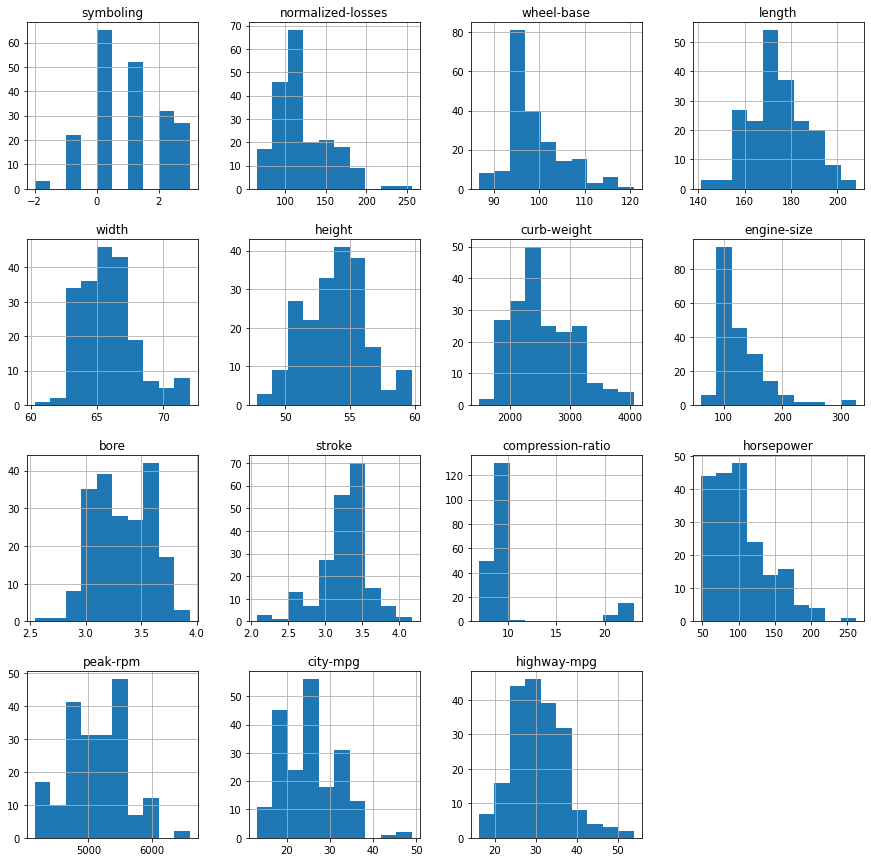

In [370]:
# se comienza el análisis examinando los histogramas de las
# propiedades numéricas para tener una visión general de las distribuciones
import matplotlib.pyplot as plt
df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())

De estos histogramas podemos identificar varias desviaciones positivas (p. ej.,
normalized-losses o engine-size) ocasionadas por algunos valores atípicos. Para
mejorar las distribuciones, se procede a aplicar algunas transformaciones a
aquellas propiedades que presentan valores atípicos extremos.

En primer lugar, se tendrá qué identificar cuáles son esos valores atípicos extremos. Para ello, podemos utilizar los diagramas de cajas (boxplots) para visualizarlos y confirmar que existen. Para dibujarlos, podemos hacerlo fácilmente utilizando la biblioteca seaborn.

In [371]:
import seaborn as sns

# mediante esta función de pueden visualizar los 'outliers'
def draw_hist_boxplot(df, feature_name):
  # se dibuja el diagrama de cajas
  sns.boxplot(x = feature_name, data = df)
  # se dibujan sobre el diagrama todos los puntos de datos que tiene la propiedad
  sns.stripplot(x = feature_name, data = df, color = "#474646")

# mediante esta función se reemplazan todos los outliers
# cualquier valor por encima o por debajo de los
# límites superior o inferior es sustituido por la mediana
def replace_outliers_with_median(df, feature_name):
  Q1 = df[feature_name].quantile(0.25)
  median = df[feature_name].quantile(0.5)
  Q3 = df[feature_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_whisker = Q1 - 1.5 * IQR
  upper_whisker = Q3 + 1.5 * IQR
  df[feature_name] = np.where((df[feature_name] < lower_whisker) | 
                              (df[feature_name] > upper_whisker), 
                                median, 
                                df[feature_name])

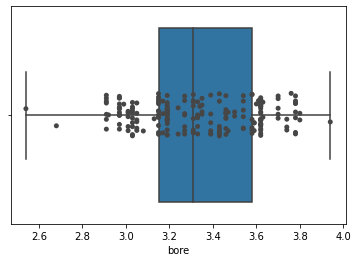

In [372]:
# se dibuja el diagrama y los puntos, se observa que no hay outliers
draw_hist_boxplot(df, 'bore')

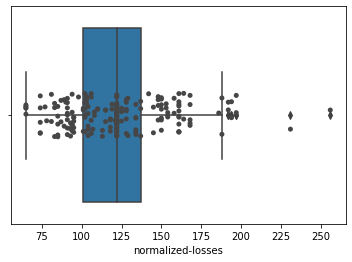

In [373]:
# se dibuja
draw_hist_boxplot(df, 'normalized-losses')

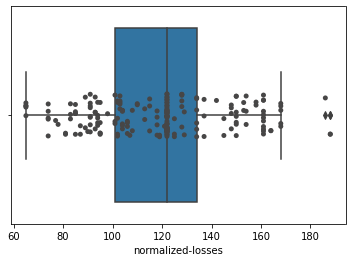

In [374]:
# se reemplazan los outliers y se vuelve a dibujar
replace_outliers_with_median(df, 'normalized-losses')
draw_hist_boxplot(df, 'normalized-losses')

In [375]:
# se puede ejecutar el método skew() sobre la serie de un dataframe para
# cuantificar la desviación de la distribución y su signo
# si lo ejecutamos antes y después de corregir los valores atípicos,
# podremos ver cómo el valor de desviación se va reduciendo ligeramente
# print(df['atributo'].skew())

print(df['curb-weight'].skew())

# corregir los valores atípicos...

# calcula la asimetría de la columna después de corregir los valores atípicos
print(df['curb-weight'].skew())

0.7058035875297635
0.7058035875297635


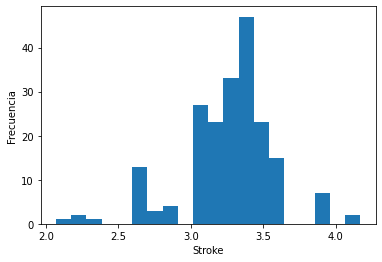

In [376]:
# dibujar atributo stroke

import pandas as pd
import matplotlib.pyplot as plt


# dibuja el histograma del atributo "stroke"
plt.hist(df['stroke'], bins=20)
plt.xlabel('Stroke')
plt.ylabel('Frecuencia')
plt.show()

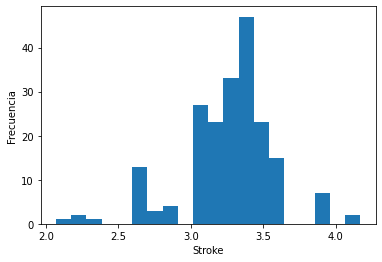

In [377]:
# reemplazar outliers de stroke y volver a dibujar

# calcula el valor de la mediana
median = df['stroke'].median()

# sustituye los outliers por la mediana
df.loc[df['stroke'] > 4.5, 'stroke'] = median

# dibuja el histograma del atributo "stroke"
plt.hist(df['stroke'], bins=20)
plt.xlabel('Stroke')
plt.ylabel('Frecuencia')
plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

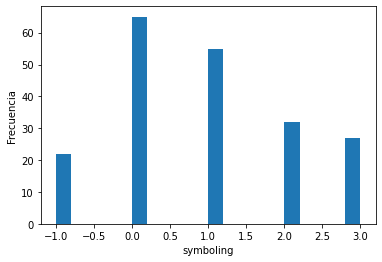

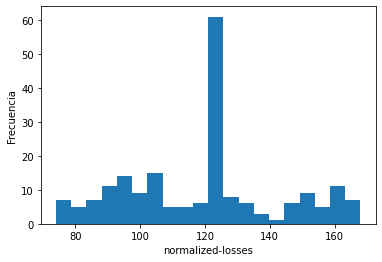

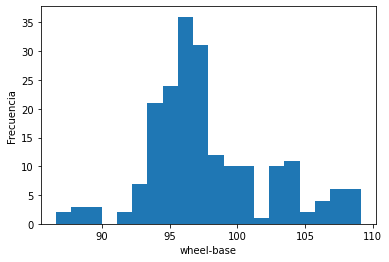

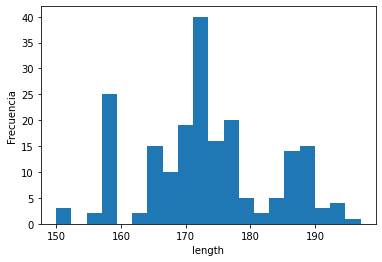

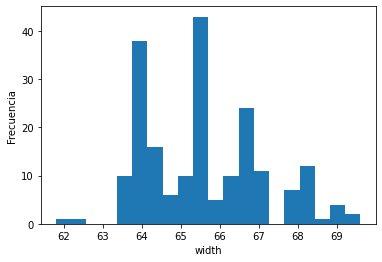

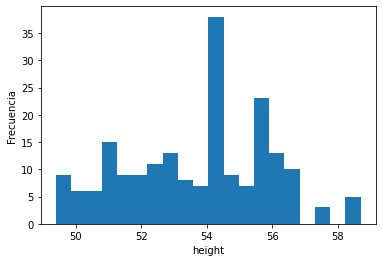

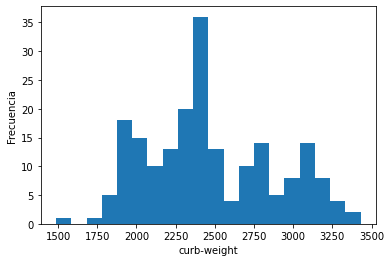

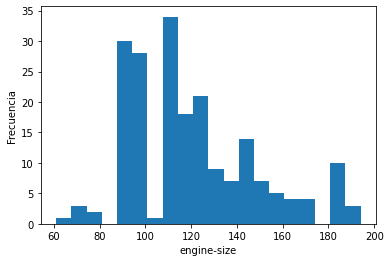

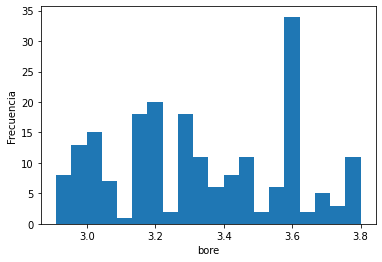

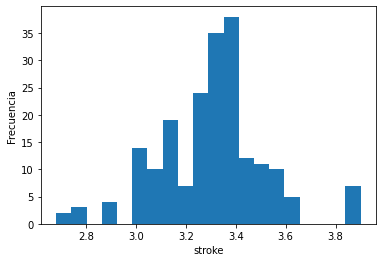

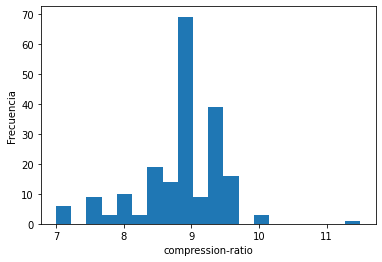

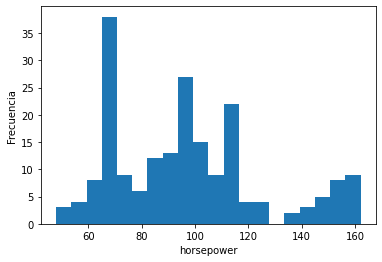

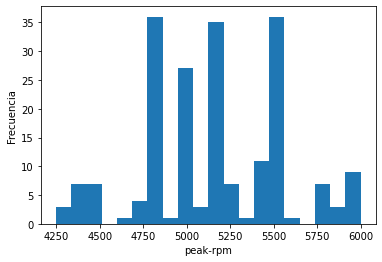

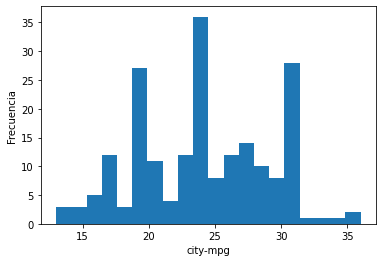

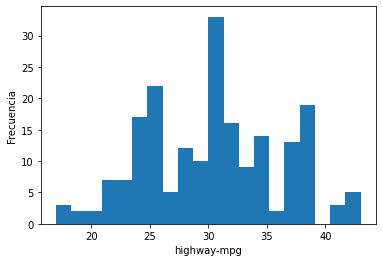

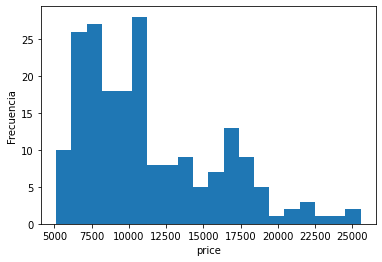

In [378]:
# repetir para los todos los atributos numéricos:
# compression-ratio, engine-size, peak-rpm, horsepower, etc.


# define una función para corregir outliers
def replace_outliers(column):
    median = column.median()
    std = column.std()
    column.loc[(column > median + 2 * std) | (column < median - 2 * std)] = median

# aplica la función a cada columna numérica
numeric_columns = df.select_dtypes(include=np.number).columns
for column in numeric_columns:
    replace_outliers(df[column])

# dibuja el histograma de cada columna numérica
for column in numeric_columns:
    plt.hist(df[column], bins=20)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

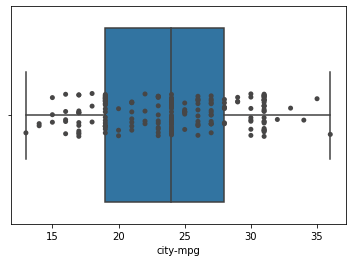

In [379]:
# atributo city-mpg
draw_hist_boxplot(df, 'city-mpg')

In [380]:
# en la propiedad city-mpg podremos ver cómo sólo hay algunos pocos valores atípicos
# como son pocos, simplemente los eliminaremos del conjunto de datos

lower_limit = df['city-mpg'].quantile(0.05)
upper_limit = df['city-mpg'].quantile(0.95)

# elimina las filas que están fuera del rango
df = df[(df['city-mpg'] >= lower_limit) & (df['city-mpg'] <= upper_limit)]

<ipython-input-381-9d0ec4ee150d>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())


array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'normalized-losses'}>,
        <AxesSubplot:title={'center':'wheel-base'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'curb-weight'}>,
        <AxesSubplot:title={'center':'engine-size'}>],
       [<AxesSubplot:title={'center':'bore'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compression-ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peak-rpm'}>,
        <AxesSubplot:title={'center':'city-mpg'}>,
        <AxesSubplot:title={'center':'highway-mpg'}>, <AxesSubplot:>]],
      dtype=object)

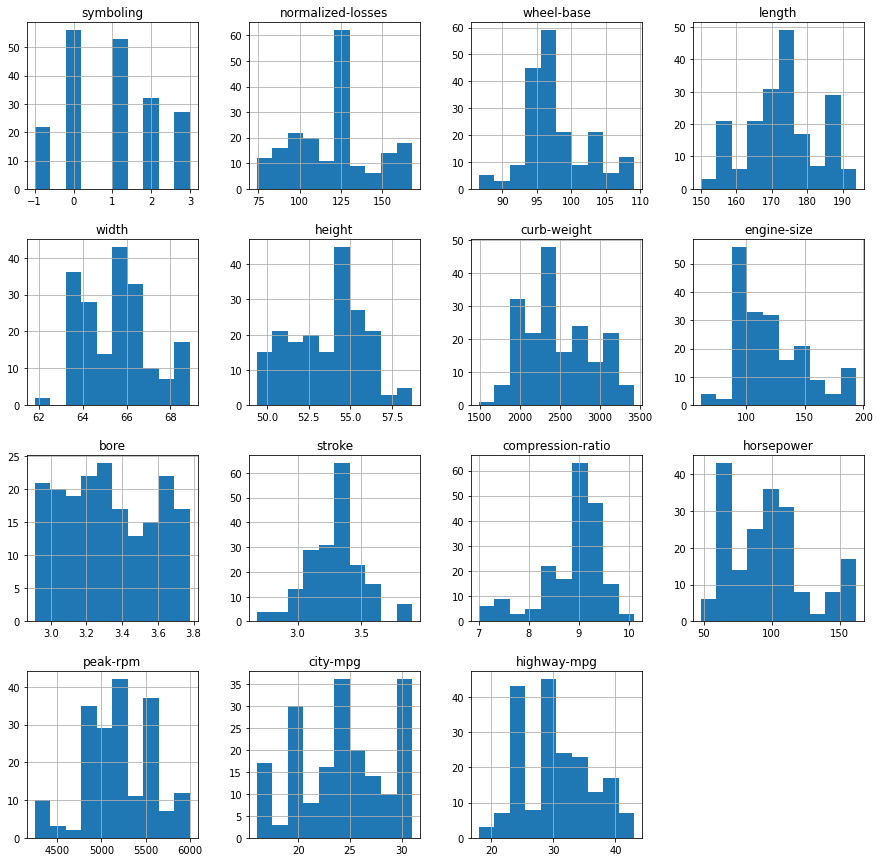

In [381]:
# una vez que hayamos finalizado, podemos volver a visualizar los histogramas
# para ver que aspecto tienen las nuevas distribuciones
df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())

En las gráficas puede observarse como las desviaciones se han reducido ligeramente y ya no existen valores atípicos extremos. Para los valores atípicos que nos queden, podemos aplicar la técnica de normalizado mediante escalado. Para ello, podemos utilizar la clase StandardScaler del módulo sklearn.preprocessing y visualizar de nuevo los histogramas para revisar las nuevas distribuciones

<ipython-input-382-d1a2407358da>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())


array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'normalized-losses'}>,
        <AxesSubplot:title={'center':'wheel-base'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'curb-weight'}>,
        <AxesSubplot:title={'center':'engine-size'}>],
       [<AxesSubplot:title={'center':'bore'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compression-ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peak-rpm'}>,
        <AxesSubplot:title={'center':'city-mpg'}>,
        <AxesSubplot:title={'center':'highway-mpg'}>, <AxesSubplot:>]],
      dtype=object)

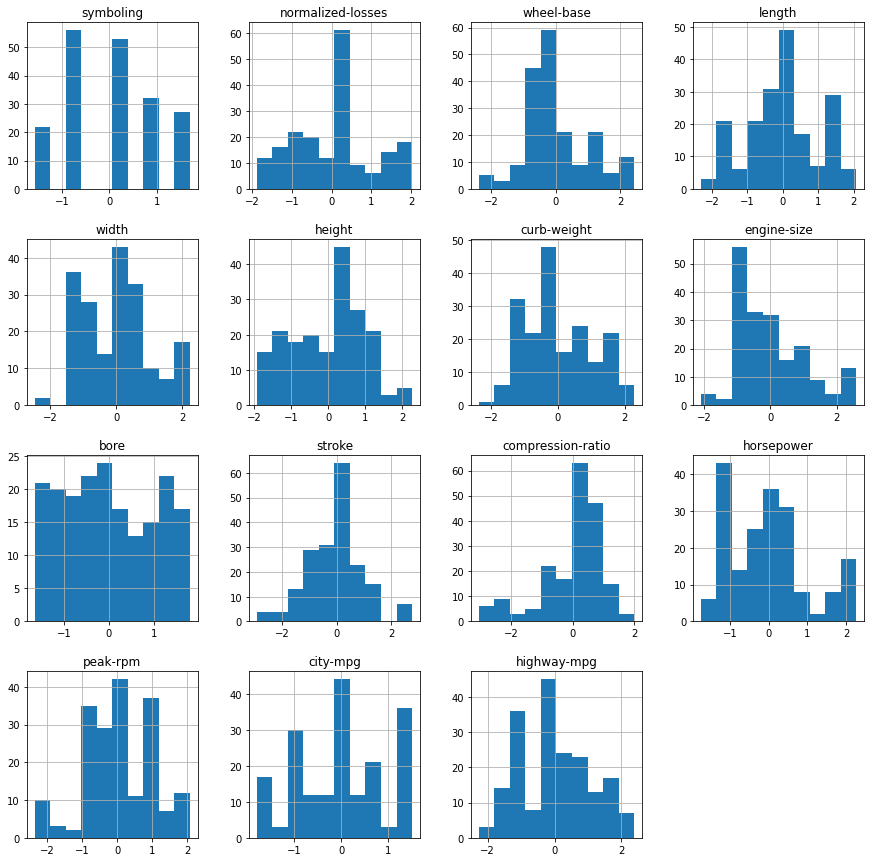

In [382]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_feature_names] = scaler.fit_transform(df[numeric_feature_names])

df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())

# Importancia de las propiedades y división del conjunto de datos

Vamos a analizar ahora el impacto de las propiedades sobre la variable objetivo. Para ello, vamos a empezar por las propiedades numéricas. Podemos realizar este análisis inicial mediante un mapa de calor que muestre las correlaciones que existen entre todas las variables, utilizando el método heatmap() del módulo seaborn e indicando que utilice la correlación de Pearson para ello.

<AxesSubplot:>

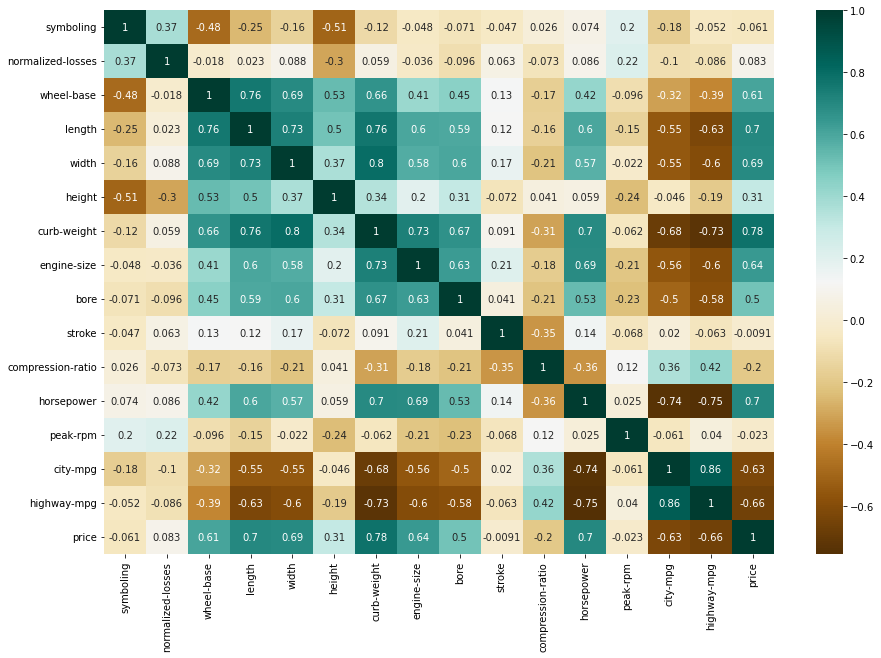

In [383]:
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap = 'BrBG', annot = True)

In [384]:
# podemos utilizar el análisis para eliminar algunas propiedades que no
# tengan ninguna correlación con la variable objetivo: symboling

df.drop(columns=['symboling', 'normalized-losses', 'stroke', 'peak-rpm'], inplace=True)

Sobre las variables categóricas, se pueden visualizar sus diagramas de cajas
para analizar sus distribuciones en relación al precio.

<AxesSubplot:xlabel='body-style', ylabel='price'>

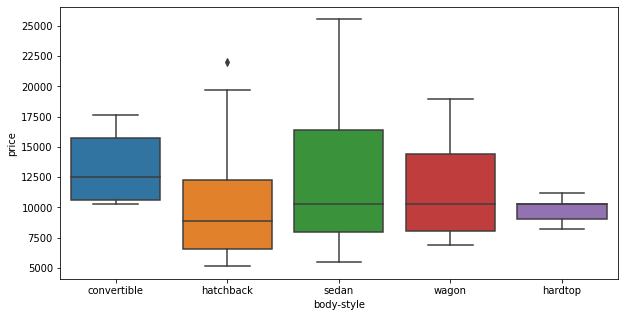

In [385]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'body-style', y = 'price', data = df)

<AxesSubplot:xlabel='aspiration', ylabel='price'>

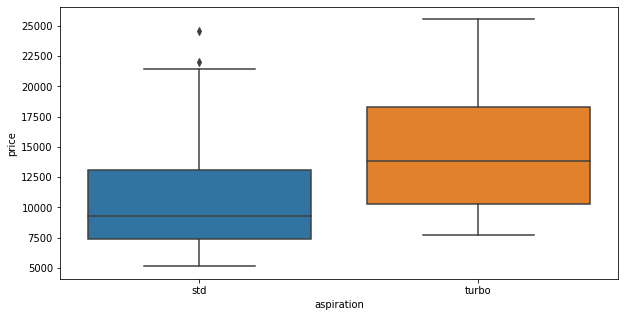

In [386]:
# aspiration

plt.figure(figsize = (10, 5))
sns.boxplot(x = 'aspiration', y = 'price', data = df)

<AxesSubplot:xlabel='fuel-system', ylabel='price'>

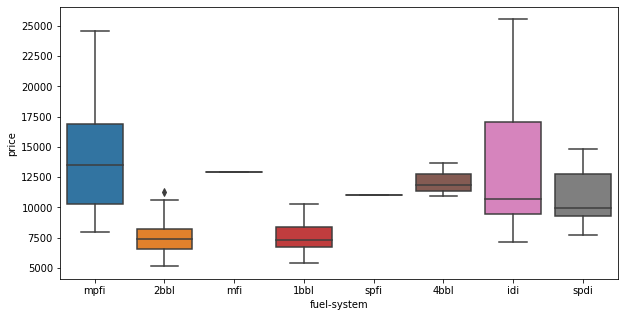

In [387]:
# fuel-system

plt.figure(figsize = (10, 5))
sns.boxplot(x = 'fuel-system', y = 'price', data = df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

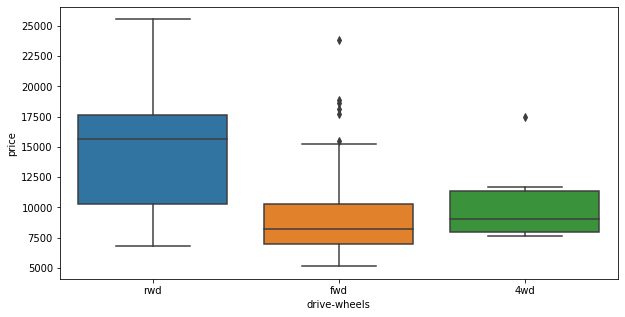

In [388]:
# drive-wheels

plt.figure(figsize = (10, 5))
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)

Una vez se hayan analizado las distintas propiedades, fijaremos las propiedades con las que entrenaremos el modelo y procederemos a la división del conjunto de datos en los conjuntos de entrenamiento, validación y pruebas.

In [389]:
numeric_feature_names = df.drop('price', axis=1).select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_feature_names = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f'Propiedades numéricas: {numeric_feature_names} ({len(numeric_feature_names)})')
print(f'Propiedades categóricas: {categorical_feature_names} ({len(categorical_feature_names)})')

all_feature_names = numeric_feature_names + categorical_feature_names

Propiedades numéricas: ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'compression-ratio', 'horsepower', 'city-mpg', 'highway-mpg'] (11)
Propiedades categóricas: ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'] (10)


In [390]:
df[numeric_feature_names].head(2)

,wheel-base,length,width,height,curb-weight,engine-size,bore,compression-ratio,horsepower,city-mpg,highway-mpg
0,-1.946102,-0.431479,-0.937606,0.190807,0.171582,0.33242,0.575965,0.208546,0.463331,-0.697932,-0.59253
1,-1.946102,-0.431479,-0.937606,0.190807,0.171582,0.33242,0.575965,0.208546,0.463331,-0.697932,-0.59253


In [391]:
df[categorical_feature_names].head(2)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi


In [392]:
from sklearn.model_selection import train_test_split

X_train_full, X_test = train_test_split(df[all_feature_names + [target]], test_size = 0.2, random_state = 1)
X_train, X_val = train_test_split(X_train_full, test_size = 0.33, random_state = 1)

y_train = X_train[target].values
y_val = X_val[target].values
y_test = X_test[target].values

X_train.drop([target], axis = 1, inplace = True)
X_val.drop([target], axis = 1, inplace = True)
X_test.drop([target], axis = 1, inplace = True)

X_train.head(2)

,wheel-base,length,width,height,curb-weight,engine-size,bore,compression-ratio,horsepower,city-mpg,...,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
194,1.402743,1.568303,1.113843,1.141267,1.362768,0.332420,1.174594,-2.239373,2.261730,-1.584935,...,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
196,2.426593,1.568303,2.238830,0.824447,1.139870,0.719256,1.813132,1.024518,0.569119,-0.254430,...,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi


# Ingeniería de propiedades

Una vez realizada la división del conjunto de datos, procederemos a codificar el conjunto de propiedades en un vector de propiedades. Utilizaremos la clase DictVectorizer para realizar la codificación one-hot de las variables categóricas.

In [393]:
train_dict = X_train[all_feature_names].to_dict(orient = 'records')
dict(sorted(train_dict[0].items()))

{'aspiration': 'turbo',
 'body-style': 'sedan',
 'bore': 1.1745941404992983,
 'city-mpg': -1.584935194670618,
 'compression-ratio': -2.239373400350488,
 'curb-weight': 1.3627684343261754,
 'drive-wheels': 'rwd',
 'engine-location': 'front',
 'engine-size': 0.3324200206533046,
 'engine-type': 'ohc',
 'fuel-system': 'mpfi',
 'fuel-type': 'gas',
 'height': 1.1412672938263824,
 'highway-mpg': -1.5214128217983123,
 'horsepower': 2.261729507820831,
 'length': 1.5683025943363877,
 'make': 'volvo',
 'num-of-cylinders': 'four',
 'num-of-doors': 'four',
 'wheel-base': 1.4027426349192296,
 'width': 1.1138425318277942}

In [394]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_train[0]

array([ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.17459414, -1.58493519, -2.2393734 ,
        1.36276843,  0.        ,  0.        ,  1.        ,  1.        ,
        0.        ,  0.33242002,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  1.14126729, -1.52141282,
        2.26172951,  1.56830259,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.40274263,
        1.11384253])

In [395]:
dv.get_feature_names_out()

array(['aspiration=std', 'aspiration=turbo', 'body-style=convertible',
       'body-style=hardtop', 'body-style=hatchback', 'body-style=sedan',
       'body-style=wagon', 'bore', 'city-mpg', 'compression-ratio',
       'curb-weight', 'drive-wheels=4wd', 'drive-wheels=fwd',
       'drive-wheels=rwd', 'engine-location=front',
       'engine-location=rear', 'engine-size', 'engine-type=dohc',
       'engine-type=l', 'engine-type=ohc', 'engine-type=ohcf',
       'engine-type=ohcv', 'engine-type=rotor', 'fuel-system=1bbl',
       'fuel-system=2bbl', 'fuel-system=4bbl', 'fuel-system=idi',
       'fuel-system=mfi', 'fuel-system=mpfi', 'fuel-system=spdi',
       'fuel-system=spfi', 'fuel-type=diesel', 'fuel-type=gas', 'height',
       'highway-mpg', 'horsepower', 'length', 'make=alfa-romero',
       'make=audi', 'make=bmw', 'make=chevrolet', 'make=dodge',
       'make=honda', 'make=isuzu', 'make=mazda', 'make=mercedes-benz',
       'make=mercury', 'make=mitsubishi', 'make=nissan', 'make=peugot'

# Entrenamiento del modelo

In [396]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [397]:
# precisión del modelo con los datos de entrenamiento
model.score(X_train, y_train)

0.9720540320511365

In [398]:
# precisión con los datos de validación
X_val = dv.transform(X_val[all_feature_names].to_dict(orient = 'records'))
model.score(X_val, y_val)

-0.028924487078988426

In [399]:
# precisón con los datos de prueba
X_test = dv.transform(X_test[all_feature_names].to_dict(orient = 'records'))
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.7399215645710442

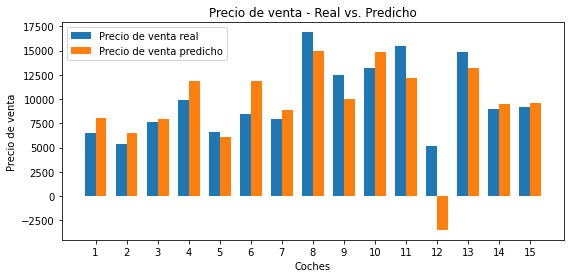

In [400]:
# representando las predicciones para los datos de prueba de los
# 15 primeros coches

import matplotlib.pyplot as plt
import numpy as np

ind = np.arange(15)
width = 0.35

plt.figure(figsize = (9, 4))
plt.bar(ind, y_test[:15], width, label = 'Precio de venta real')
plt.bar(ind+width, y_pred[:15], width, label = 'Precio de venta predicho')

plt.xticks(ind+width / 2, np.arange(1, 16))
plt.legend(loc = 'best')

plt.xlabel('Coches')
plt.ylabel('Precio de venta')
plt.title('Precio de venta - Real vs. Predicho')

plt.show()

# Modelo basado en una red neuronal

In [401]:
# implementa una red neuronal para realizar las mismas predicciones

In [402]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [403]:
# define the keras model
#iniciadores para relu: glorot
#iniciadores para sigmoid: he
model = Sequential()

# Accuracy: 80.55
model.add(Dense(64, input_shape=(21,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, kernel_initializer="he_uniform", activation='linear'))


In [404]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                1408      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


In [405]:
from keras.optimizers import Adam
# compile the keras model
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

In [406]:
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [407]:
# x = df[all_feature_names + [target]].values
# y = df[target].values

X = df.drop('price', axis=1).values
y = df['price'].values
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column].values)

for column in df.columns:
    if df[column].dtype != 'object':
        df[column] = df[column].astype('float32')

# X = df.drop(columns=['price']).values
X = df.drop(columns=['price']).values
y = df['price'].values

In [408]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [409]:
history = model.fit(X,y , epochs=500, batch_size=768)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 149346208.0000
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 149277680.0000
Epoch 3/500
1/1 [==============================] - 0s 11ms/step - loss: 149209760.0000
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 149136512.0000
Epoch 5/500
1/1 [==============================] - 0s 14ms/step - loss: 149048480.0000
Epoch 6/500
1/1 [==============================] - 0s 13ms/step - loss: 148940400.0000
Epoch 7/500
1/1 [==============================] - 0s 12ms/step - loss: 148806864.0000
Epoch 8/500
1/1 [==============================] - 0s 22ms/step - loss: 148643248.0000
Epoch 9/500
1/1 [==============================] - 0s 14ms/step - loss: 148445328.0000
Epoch 10/500
1/1 [==============================] - 0s 16ms/step - loss: 148208448.0000
Epoch 11/500
1/1 [==============================] - 0s 18ms/step - loss: 147927248.0000
Epoch 12/500
1/1 [=========================

In [410]:
loss = model.evaluate(X, y)
print('Accuracy: %.2f' % loss)

6/6 [==============================] - 0s 5ms/step - loss: 5175510.5000
Accuracy: 5175510.50


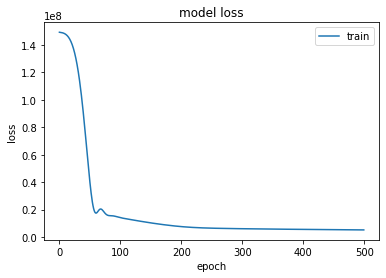

In [411]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()